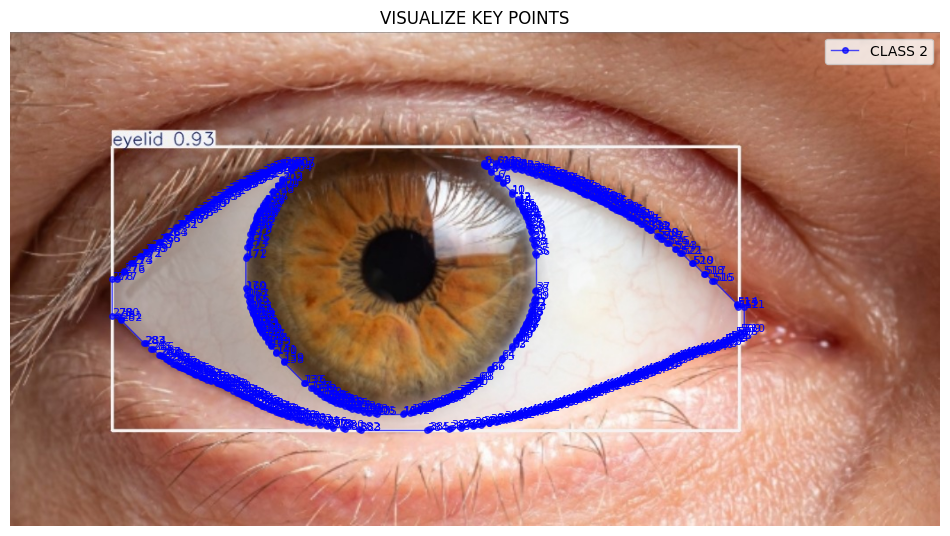

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ファイルパスの設定
img_path = r"C:\Users\CorneAI\Desktop\Mobius_for_YOLOv8\train\images\1_1i_Ls_1.jpg"
label_path = r"C:\Users\CorneAI\Desktop\Mobius_for_YOLOv8\train\labels\1_1i_Ls_1.txt"
img_path = r"C:\Users\CorneAI\YOLOv11_Mobius\instanceenv\runs\segment\predict9\sample_1.jpg"
label_path = r"C:\Users\CorneAI\YOLOv11_Mobius\instanceenv\runs\segment\predict9\labels\sample_1.txt"


# 画像の読み込み
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 画像のサイズを取得
height, width = img.shape[:2]

# ラベルの読み込み
with open(label_path, 'r') as f:
    labels = f.readlines()

# プロットの作成
plt.figure(figsize=(12, 8))
plt.imshow(img)

# 各クラスの色を定義
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# 各ラベルに対して処理
for label in labels:
    values = list(map(float, label.strip().split()))
    class_id = int(values[0])
    
    # x,y座標のペアを取得
    points = []
    for i in range(1, len(values), 2):
        if i+1 < len(values):
            x = values[i] * width
            y = values[i+1] * height
            points.append((x, y))
    
    # pointsをnumpy配列に変換
    points = np.array(points)
    
    # 点と線の描画
    color = colors[class_id % len(colors)]
    plt.plot(points[:, 0], points[:, 1], 'o-', color=color, markersize=4, 
            label=f'CLASS {class_id}', linewidth=1, alpha=0.7)
    
    # キーポイントの番号付け
    for i, (x, y) in enumerate(points):
        plt.text(x, y, str(i), fontsize=8, color=color)

plt.title('VISUALIZE KEY POINTS')
plt.legend()
plt.axis('off')
plt.show()